<a href="https://colab.research.google.com/github/taketaka-MU/hs-2023/blob/main/20230810/ohtani2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 大谷選手の 2023 年度のホームランについて調べる

参考サイト
- https://web3.hide.ac/articles/dtF3OzR8y
- https://baseballsavant.mlb.com/statcast_leaderboard


### データの取得

In [ ]:
!pip install pybaseball
from pybaseball import statcast
df = statcast(start_dt='2023-03-31', end_dt='2023-12-31')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.0/420.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.2/342.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0
This is a large query, it may take a moment to complete


/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates


100%|██████████| 230/230 [04:04<00:00,  1.06s/it]


大谷選手のデータを抜き出し、ホームランのデータを抽出する

In [ ]:
df_ohtani = df[df['batter'] == 660271] # Shohei Ohtani
ohtani_home_run_data = df_ohtani[df_ohtani['events'] == 'home_run'] # ホームラン
print(ohtani_home_run_data.shape)

(40, 92)


打球角度と初速のデータに抜けがあるものを削除し、単位を m, s に変更

In [ ]:
ohtani_home_run_data = ohtani_home_run_data.dropna(subset=['launch_angle', 'launch_speed'])      # 抜けのあるデータを削除
ohtani_home_run_data['hit_distance_m'] = ohtani_home_run_data['hit_distance_sc'] * 0.3048        # 飛距離の単位を m
ohtani_home_run_data['launch_speed_ms'] = ohtani_home_run_data['launch_speed'] * 1609.34 / 3600  # 打球初速の単位を m/s

### どんなデータがあるか見てみる

In [ ]:
ohtani_home_run_data

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,hit_distance_m,launch_speed_ms
2294,FF,2023-08-03,96.2,-1.66,6.47,"Campbell, Isaiah",660271,663462,home_run,hit_into_play,...,3,3,1,Strategic,Standard,209,0.079,1.021,118.872,47.699049
4056,FF,2023-07-28,93.4,-2.48,5.8,"Gausman, Kevin",660271,592332,home_run,hit_into_play,...,0,1,0,Strategic,Standard,218,-0.103,1.0,121.0056,46.268525
179,FF,2023-07-27,94.8,-1.54,5.26,"Manning, Matt",660271,666159,home_run,hit_into_play,...,2,7,2,Strategic,Standard,206,-0.047,0.934,132.588,52.258846
516,FF,2023-07-27,94.2,-1.4,5.28,"Manning, Matt",660271,666159,home_run,hit_into_play,...,0,5,0,Strategic,Standard,199,-0.116,1.902,116.7384,48.101384
2771,FC,2023-07-23,92.2,-2.02,5.85,"Keller, Mitch",660271,656605,home_run,hit_into_play,...,1,1,1,Strategic,Standard,172,0.107,0.961,124.968,50.470691
1547,FF,2023-07-17,96.9,-2.34,5.77,"King, Michael",660271,650633,home_run,hit_into_play,...,3,3,3,Strategic,Standard,215,0.352,1.932,122.8344,47.609642
4024,FF,2023-07-16,90.0,-1.28,5.41,"Maton, Phil",660271,664208,home_run,hit_into_play,...,8,8,9,Strategic,Standard,183,0.065,1.0,125.2728,47.117899
4659,SL,2023-07-15,89.2,-0.28,6.01,"Pressly, Ryan",660271,519151,home_run,hit_into_play,...,10,10,12,Strategic,Standard,118,0.049,1.011,123.1392,46.268525
408,SL,2023-07-08,84.2,-1.87,5.88,"Grove, Michael",660271,675627,home_run,hit_into_play,...,9,4,9,Strategic,Standard,71,-0.011,1.904,131.9784,47.028491
2937,SL,2023-07-02,83.6,0.89,5.67,"Nelson, Kyle",660271,669459,home_run,hit_into_play,...,5,5,2,Strategic,Standard,259,0.038,1.033,138.3792,51.588288


一番最近のホームランについて調べてみる

In [ ]:
last_home_run=ohtani_home_run_data.iloc[0] # 一番最近のホームラン
print(last_home_run)

pitch_type                             FF
game_date             2023-08-03 00:00:00
release_speed                        96.2
release_pos_x                       -1.66
release_pos_z                        6.47
                             ...         
spin_axis                             209
delta_home_win_exp                  0.079
delta_run_exp                       1.021
hit_distance_m                    118.872
launch_speed_ms                 47.699049
Name: 2294, Length: 94, dtype: object


In [ ]:
angle=last_home_run['launch_angle'] # 角度 (°)
speed = last_home_run['launch_speed_ms']  # 初速 (m/s)
print('angle=%f, speed=%f' % (angle, speed))

angle=23.000000, speed=47.699049


In [ ]:
print(speed*60*60/1000) # 時速

171.716578


### 空気抵抗を加えた方程式で軌道を計算

(40, 94)
118.872


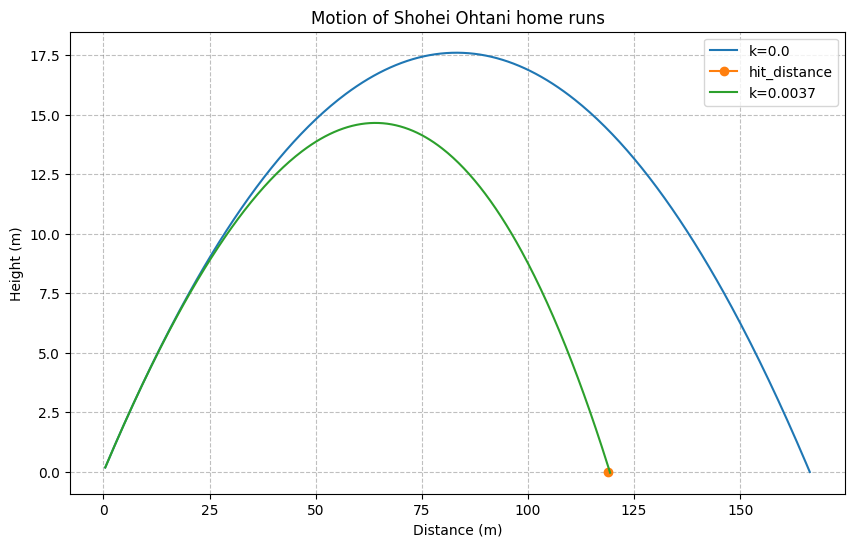

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calc(launch_speed, launch_angle, k): # 空気抵抗を加えた方程式
    launch_angle = np.radians(launch_angle)  # 打球角度の単位を radian (弧度法)
    g = 9.81  # 重力加速度 m/s^2
    ux = launch_speed * np.cos(launch_angle)
    uy = launch_speed * np.sin(launch_angle)
    x, y = 0, 0
    dt=0.01
    gux,guy,gx,gy = [], [], [], []
    for i in range(1000):
      uxold,uyold,xold,yold=ux,uy,x,y
      u=np.sqrt(ux*ux+uy*uy)
      ux += (- k * u * ux)*dt
      uy += (-g -k * u * uy)*dt
      x += ux * dt
      y += uy * dt
      gux.append(ux)
      guy.append(uy)
      gx.append(x)
      gy.append(y)
      if(y < 0):
        break;

    return gux,guy,gx,gy

plt.figure(figsize=(10, 6))
print(ohtani_home_run_data.shape)
row=ohtani_home_run_data.iloc[0] # 最新のホームラン
hit_distance = row['hit_distance_m']
launch_speed = row['launch_speed_ms']
launch_angle = row['launch_angle']
print(hit_distance)
k=0.0037
ux0, uy0, x0, y0 = calc(launch_speed, launch_angle, 0.0)
ux, uy, x, y = calc(launch_speed, launch_angle, k)
plt.plot(x0, y0,label="k={}".format(0.0))
plt.plot(hit_distance, 0,marker='o', label="hit_distance")
plt.plot(x, y,label="k={}".format(k))

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Motion of Shohei Ohtani home runs')
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()

# ホームランデータの解析

打球角度と初速の関係


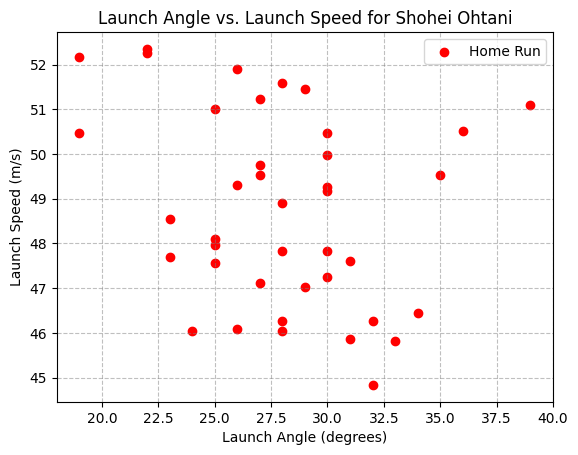

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(ohtani_home_run_data['launch_angle'], ohtani_home_run_data['launch_speed_ms'], color='red', label='Home Run')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Launch Speed (m/s)')
plt.title('Launch Angle vs. Launch Speed for Shohei Ohtani')
plt.legend()
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.show()

飛距離と初速の関係

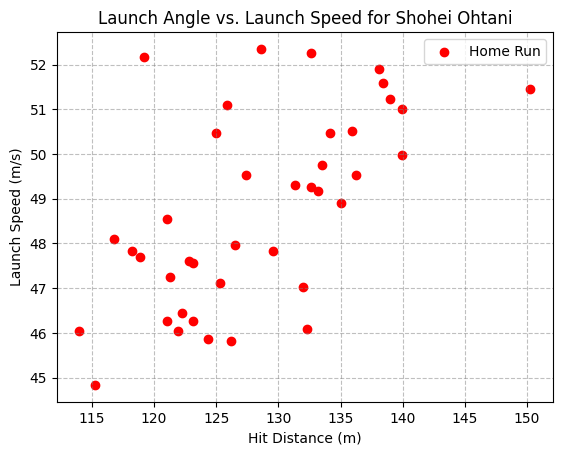

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(ohtani_home_run_data['hit_distance_m'], ohtani_home_run_data['launch_speed_ms'], color='red', label='Home Run')
plt.xlabel('Hit Distance (m)')
plt.ylabel('Launch Speed (m/s)')
plt.title('Hit Distance vs. Launch Speed for Shohei Ohtani')
plt.legend()
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5)
plt.show()